In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/covid_lies.csv')
df.head()

,misconception_id,misconception,tweet_id,label
0,3,Coronavirus is genetically engineered.,1233965490948591616,na
1,30,Blowing conch shells destroys coronavirus pote...,1233907923765559296,na
2,57,Swans and dolphins swimming in Venice canals f...,1233911842910720000,na
3,22,Cocaine cures coronavirus.,1233947734094290944,na
4,32,Observing janata curfew will result in the red...,1233937085297332224,na


In [3]:
df.tail()

,misconception_id,misconception,tweet_id,label
6586,50,It is safe for individuals infected with COVID...,1233949547715584000,na
6587,19,Vitamin C cures coronavirus.,1233966049097285632,na
6588,22,Cocaine cures coronavirus.,1233965616316334080,na
6589,61,Lions were freed to keep people off the street...,1233906211310825472,na
6590,25,Holy communion cannot be the cause of the spre...,1233983733906075648,na


In [4]:
df.sample(15)

,misconception_id,misconception,tweet_id,label
4198,51,COVID-19 is only as deadly as the seasonal flu.,1233963011074744320,neg
6196,23,SARS-CoV-2 can survive for weeks on surfaces.,1233993066354106368,pos
3695,31,The lifetime of SARS-CoV-2 is only 12 hours.,1233966879322116096,na
1865,37,Jamaat cannot become a source of infection.,1233951154507116544,na
3937,15,Coronavirus can only survive in cold temperatu...,1233960501224173568,na
129,12,Methanol consumption cures or protects against...,1233951518761639936,na
4896,3,Coronavirus is genetically engineered.,1233965389689839616,na
2274,6,A decade-old map published by the World Popula...,1233968549560868864,na
4692,61,Lions were freed to keep people off the street...,1233971194723876864,na
3607,42,Vitamin D pills prevent COVID-19.,1233925611145584640,na


In [5]:
df.shape

(6591, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   misconception_id  6591 non-null   int64 
 1   misconception     6591 non-null   object
 2   tweet_id          6591 non-null   int64 
 3   label             6591 non-null   object
dtypes: int64(2), object(2)
memory usage: 206.1+ KB


In [7]:
df.columns

Index(['misconception_id', 'misconception', 'tweet_id', 'label'], dtype='object')

**EXPLORATORY DATA ANALYSIS**

In [8]:
import collections

In [9]:
counter = collections.Counter(df['label'])
print(counter)

Counter({'na': 6149, 'pos': 288, 'neg': 154})


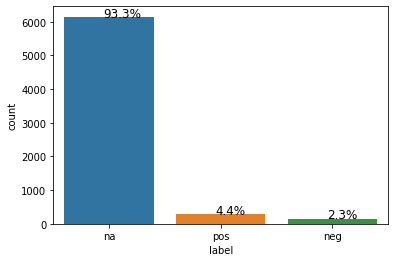

In [10]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

ax = sns.countplot(data = df, x = 'label')

without_hue(ax, df.label)

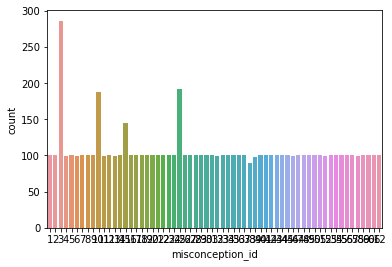

In [11]:
sns.countplot(data = df, x = 'misconception_id')

In [12]:
array = [3, 10, 15, 25]
df.loc[df['misconception_id'].isin(array)]

,misconception_id,misconception,tweet_id,label
0,3,Coronavirus is genetically engineered.,1233965490948591616,na
5,25,Holy communion cannot be the cause of the spre...,1233955845756653568,na
7,3,Coronavirus is genetically engineered.,1233952635725778944,na
10,3,Coronavirus is genetically engineered.,1233932767102152704,pos
11,10,Coronavirus is caused by 5G.,1233961044172853248,na
...,...,...,...,...
6551,15,Coronavirus can only survive in cold temperatu...,1233991917383213056,na
6560,25,Holy communion cannot be the cause of the spre...,1233960377806770176,na
6571,3,Coronavirus is genetically engineered.,1233961447962492928,na
6572,25,Holy communion cannot be the cause of the spre...,1233968524906856448,na


In [13]:
df.loc[df['misconception_id'] == 38]

,misconception_id,misconception,tweet_id,label
20,38,Shaking hands cannot spread coronavirus.,1233977686067949568,na
46,38,Shaking hands cannot spread coronavirus.,1233926530423775232,na
61,38,Shaking hands cannot spread coronavirus.,1233991257459961856,na
94,38,Shaking hands cannot spread coronavirus.,1233955109177921536,na
106,38,Shaking hands cannot spread coronavirus.,1233924072695832576,na
...,...,...,...,...
5916,38,Shaking hands cannot spread coronavirus.,1233947984435376128,na
6151,38,Shaking hands cannot spread coronavirus.,1233976000113004544,na
6318,38,Shaking hands cannot spread coronavirus.,1233982694008033280,na
6344,38,Shaking hands cannot spread coronavirus.,1233906138409787392,na


**DATA PRE-PROCESSING**

In [14]:
df['label'] = df['label'].replace(['pos'], 1)
df['label'] = df['label'].replace(['neg'], 2)
df['label'] = df['label'].replace(['na'], 0)

df.head()

,misconception_id,misconception,tweet_id,label
0,3,Coronavirus is genetically engineered.,1233965490948591616,0
1,30,Blowing conch shells destroys coronavirus pote...,1233907923765559296,0
2,57,Swans and dolphins swimming in Venice canals f...,1233911842910720000,0
3,22,Cocaine cures coronavirus.,1233947734094290944,0
4,32,Observing janata curfew will result in the red...,1233937085297332224,0


In [15]:
df['label'].unique()

array([0, 1, 2])

In [16]:
#lower case conversion
df['misconception'] = df['misconception'].str.lower()

In [17]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
#removing punctuations
table = str.maketrans("", "", string.punctuation)
df['misconception'] = [w.translate(table) for w in df['misconception']]

In [19]:
df.sample(15)

,misconception_id,misconception,tweet_id,label
5657,48,there will be 500 deaths at the end of the pan...,1233930525422837760,0
5107,38,shaking hands cannot spread coronavirus,1233986381262680064,0
1567,43,miracle mineral suppliment mms will prevent an...,1233961970161913856,0
5686,51,covid19 is only as deadly as the seasonal flu,1233947517781327872,1
783,46,kenneth copeland on victory channel can cure c...,1233985309118849024,0
6157,46,kenneth copeland on victory channel can cure c...,1233985031053377536,0
1684,27,drinking cow urine and applying cow dung on th...,1233964234704211968,1
1464,25,holy communion cannot be the cause of the spre...,1233919722296692736,0
422,10,coronavirus is caused by 5g,1233966296087302144,0
1597,3,coronavirus is genetically engineered,1233935092138967040,0


In [20]:
#removing stopwords 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
",".join(stopwords.words('english'))
stop_words = set(stopwords.words('english'))

In [22]:
stop_words.update(('cannot', 'following'))

In [23]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cannot',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'following',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'o

In [24]:
def remove_mystopwords(x):
  return ",".join([word for word in str(x).split() if word not in stop_words])

df['misconception'] = df['misconception'].apply(lambda x : remove_mystopwords(x))

In [25]:
df.head()

,misconception_id,misconception,tweet_id,label
0,3,"coronavirus,genetically,engineered",1233965490948591616,0
1,30,"blowing,conch,shells,destroys,coronavirus,potency",1233907923765559296,0
2,57,"swans,dolphins,swimming,venice,canals,covid19,...",1233911842910720000,0
3,22,"cocaine,cures,coronavirus",1233947734094290944,0
4,32,"observing,janata,curfew,result,reduction,covid...",1233937085297332224,0


In [26]:
# individual words considered as tokens
tokenized_tweet = df['misconception'].apply(lambda x: x.split())
tokenized_tweet.head()

0                 [coronavirus,genetically,engineered]
1    [blowing,conch,shells,destroys,coronavirus,pot...
2    [swans,dolphins,swimming,venice,canals,covid19...
3                          [cocaine,cures,coronavirus]
4    [observing,janata,curfew,result,reduction,covi...
Name: misconception, dtype: object

In [27]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.sample(10)

918     [dean,koontz,predicted,pandemic,1981,novel,eye...
2633                      [boiled,ginger,cure,coronaviru]
6262    [miracle,mineral,suppliment,mms,prevent,cure,c...
1740    [kyriakos,velopoulos,sells,hand,cream,complete...
4757                      [coronavirus,genetically,engin]
1821      [blowing,conch,shells,destroys,coronavirus,pot]
374     [pod,humpback,whales,returned,arabian,sea,offs...
2533                     [essential,oils,cure,coronaviru]
5777                              [500,deaths,end,pandem]
4094    [chloroquine,food,drug,administration,fda,appr...
Name: misconception, dtype: object

In [28]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet

df.head()

,misconception_id,misconception,tweet_id,label,clean_tweet
0,3,"coronavirus,genetically,engineered",1233965490948591616,0,"coronavirus,genetically,engin"
1,30,"blowing,conch,shells,destroys,coronavirus,potency",1233907923765559296,0,"blowing,conch,shells,destroys,coronavirus,pot"
2,57,"swans,dolphins,swimming,venice,canals,covid19,...",1233911842910720000,0,"swans,dolphins,swimming,venice,canals,covid19,..."
3,22,"cocaine,cures,coronavirus",1233947734094290944,0,"cocaine,cures,coronaviru"
4,32,"observing,janata,curfew,result,reduction,covid...",1233937085297332224,0,"observing,janata,curfew,result,reduction,covid..."


In [29]:
#removing commas from clean_tweet column
df['clean_tweet'] = df['clean_tweet'].str.replace(','," ")

In [30]:
df.head()

,misconception_id,misconception,tweet_id,label,clean_tweet
0,3,"coronavirus,genetically,engineered",1233965490948591616,0,coronavirus genetically engin
1,30,"blowing,conch,shells,destroys,coronavirus,potency",1233907923765559296,0,blowing conch shells destroys coronavirus pot
2,57,"swans,dolphins,swimming,venice,canals,covid19,...",1233911842910720000,0,swans dolphins swimming venice canals covid19 ...
3,22,"cocaine,cures,coronavirus",1233947734094290944,0,cocaine cures coronaviru
4,32,"observing,janata,curfew,result,reduction,covid...",1233937085297332224,0,observing janata curfew result reduction covid...


In [31]:
df.head(15)

,misconception_id,misconception,tweet_id,label,clean_tweet
0,3,"coronavirus,genetically,engineered",1233965490948591616,0,coronavirus genetically engin
1,30,"blowing,conch,shells,destroys,coronavirus,potency",1233907923765559296,0,blowing conch shells destroys coronavirus pot
2,57,"swans,dolphins,swimming,venice,canals,covid19,...",1233911842910720000,0,swans dolphins swimming venice canals covid19 ...
3,22,"cocaine,cures,coronavirus",1233947734094290944,0,cocaine cures coronaviru
4,32,"observing,janata,curfew,result,reduction,covid...",1233937085297332224,0,observing janata curfew result reduction covid...
5,25,"holy,communion,cause,spread,coronavirus",1233955845756653568,0,holy communion cause spread coronaviru
6,61,"lions,freed,keep,people,streets,moscow",1233917889557692416,0,lions freed keep people streets moscow
7,3,"coronavirus,genetically,engineered",1233952635725778944,0,coronavirus genetically engin
8,40,"cannabis,protects,covid19",1233940738439815168,0,cannabis protects covid19
9,50,"safe,individuals,infected,covid19,go,work",1233920123183828992,0,safe individuals infected covid19 go work


**VISUALIZATION**

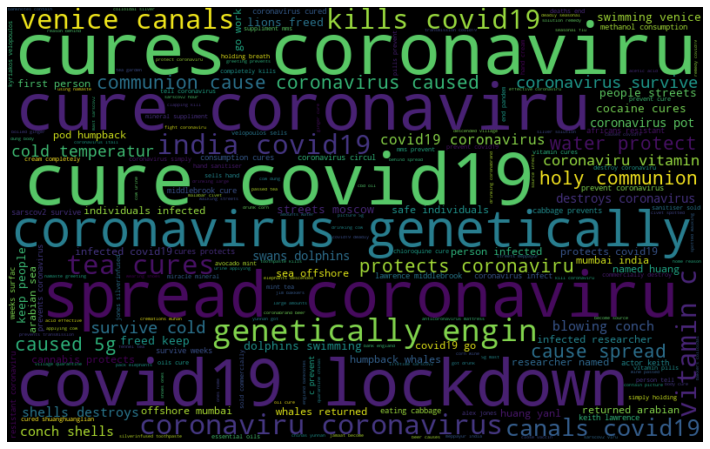

In [32]:
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
pos_words = wordcloud.words_.keys()
print(pos_words)
print(len(pos_words))

dict_keys(['cures coronaviru', 'cure covid19', 'covid19 lockdown', 'cure coronaviru', 'spread coronaviru', 'coronavirus genetically', 'genetically engin', 'coronaviru coronavirus', 'india covid19', 'vitamin c', 'kills covid19', 'tea cures', 'venice canals', 'canals covid19', 'protects coronaviru', 'water protect', 'holy communion', 'communion cause', 'cause spread', 'coronavirus caused', 'caused 5g', 'coronavirus survive', 'survive cold', 'cold temperatur', 'coronaviru vitamin', 'covid19 coronavirus', 'blowing conch', 'conch shells', 'shells destroys', 'destroys coronavirus', 'coronavirus pot', 'swans dolphins', 'dolphins swimming', 'swimming venice', 'cocaine cures', 'lions freed', 'freed keep', 'keep people', 'people streets', 'streets moscow', 'cannabis protects', 'protects covid19', 'safe individuals', 'individuals infected', 'infected covid19', 'covid19 go', 'go work', 'pod humpback', 'humpback whales', 'whales returned', 'returned arabian', 'arabian sea', 'sea offshore', 'offshor

In [34]:
wc = wordcloud.words_
print(wc)

{'cures coronaviru': 1.0, 'cure covid19': 0.998, 'covid19 lockdown': 0.798, 'cure coronaviru': 0.798, 'spread coronaviru': 0.764, 'coronavirus genetically': 0.572, 'genetically engin': 0.572, 'coronaviru coronavirus': 0.432, 'india covid19': 0.4, 'vitamin c': 0.4, 'kills covid19': 0.4, 'tea cures': 0.4, 'venice canals': 0.398, 'canals covid19': 0.398, 'protects coronaviru': 0.396, 'water protect': 0.396, 'holy communion': 0.384, 'communion cause': 0.384, 'cause spread': 0.384, 'coronavirus caused': 0.376, 'caused 5g': 0.376, 'coronavirus survive': 0.29, 'survive cold': 0.29, 'cold temperatur': 0.29, 'coronaviru vitamin': 0.266, 'covid19 coronavirus': 0.242, 'blowing conch': 0.2, 'conch shells': 0.2, 'shells destroys': 0.2, 'destroys coronavirus': 0.2, 'coronavirus pot': 0.2, 'swans dolphins': 0.2, 'dolphins swimming': 0.2, 'swimming venice': 0.2, 'cocaine cures': 0.2, 'lions freed': 0.2, 'freed keep': 0.2, 'keep people': 0.2, 'people streets': 0.2, 'streets moscow': 0.2, 'cannabis prot

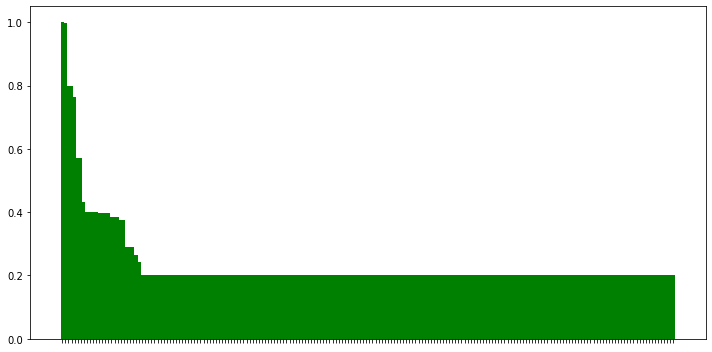

In [35]:
plt.figure(figsize=(10,5))
plt.bar(wc.keys(), wc.values(), width = 1.0, color='g')

ax = plt.axes()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [36]:
filtered_words = [word for word in all_words.split()]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

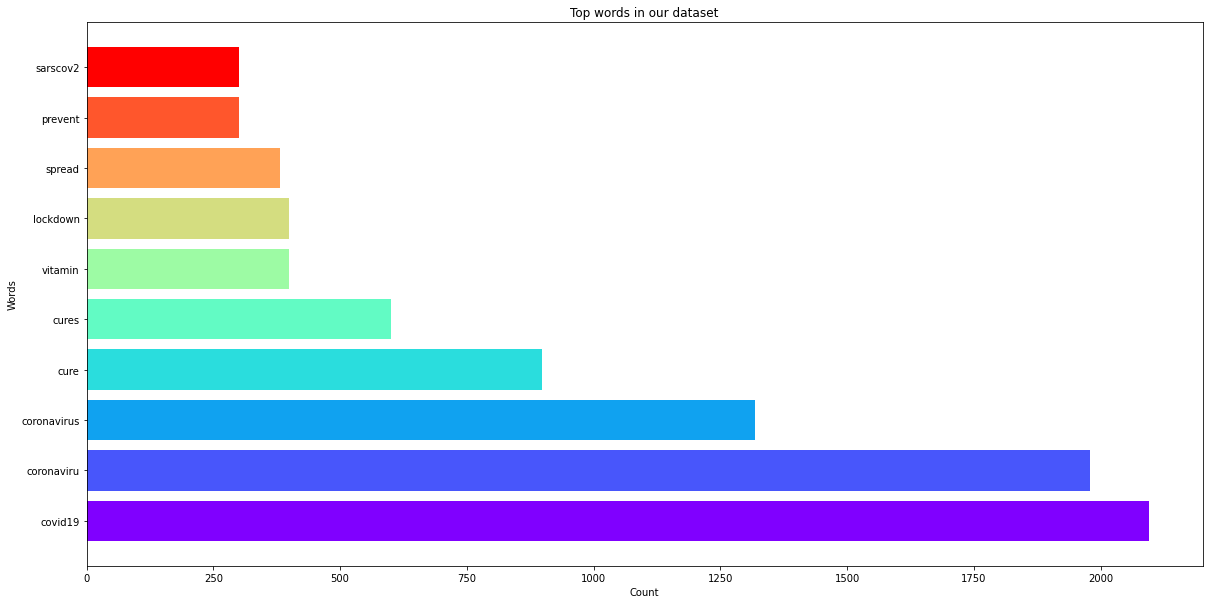

In [37]:
from matplotlib import rcParams
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in our dataset')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

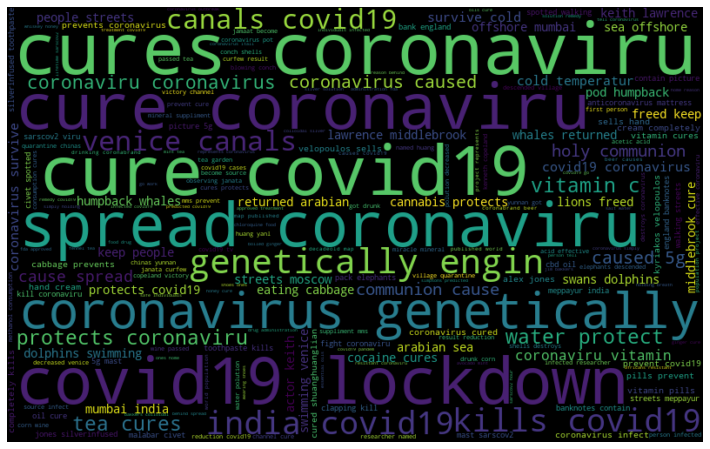

In [38]:
# frequent words visualization for +ve
all_words_na = " ".join([sentence for sentence in df['clean_tweet'][df['label']== 0 ]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_na)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<BarContainer object of 10 artists>

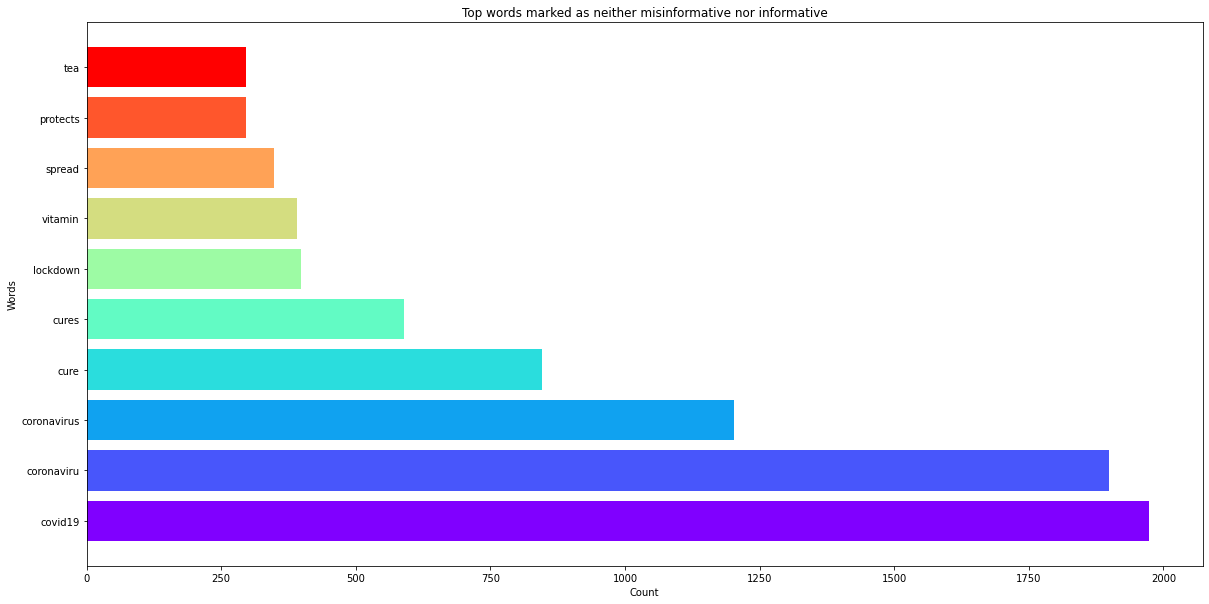

In [39]:
filtered_words = [word for word in all_words_na.split()]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)


colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words marked as neither misinformative nor informative')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

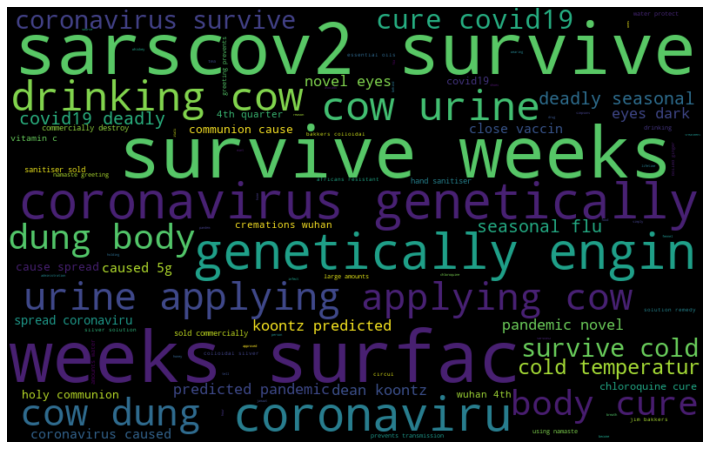

In [40]:
# frequent words visualization for -ve
all_words_pos = " ".join([sentence for sentence in df['clean_tweet'][df['label']== 1 ]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_pos)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<BarContainer object of 10 artists>

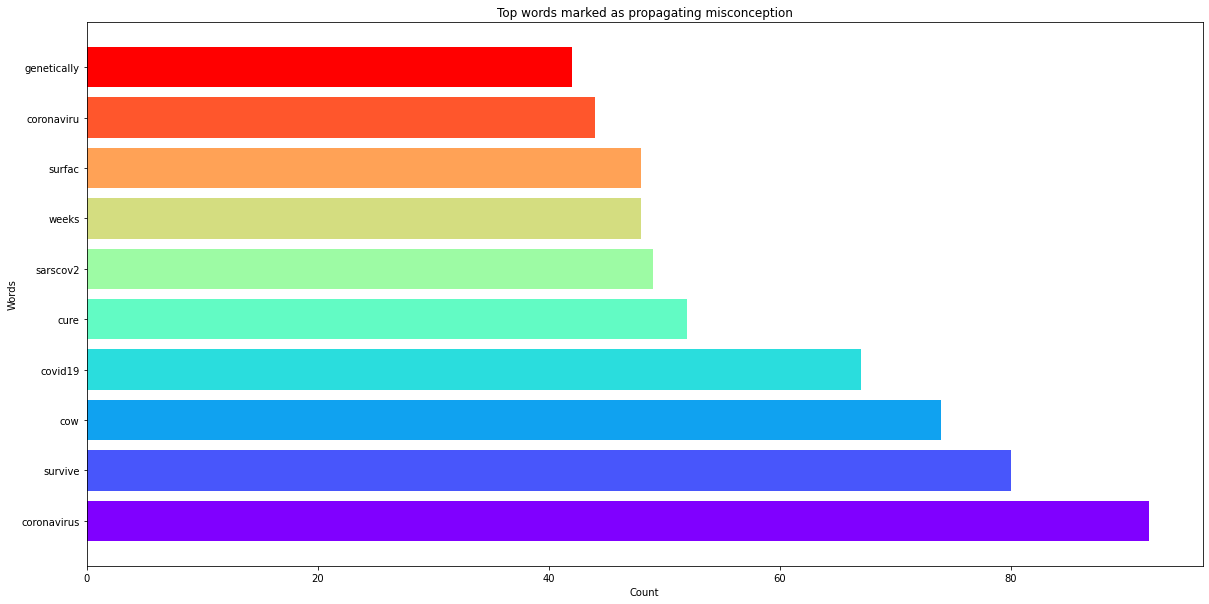

In [41]:
filtered_words = [word for word in all_words_pos.split()]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)


colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words marked as propagating misconception')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

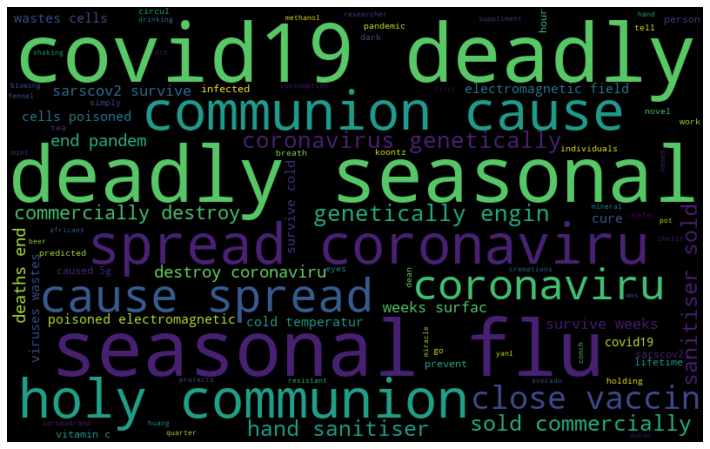

In [42]:
# frequent words visualization for -ve
all_words_neg = " ".join([sentence for sentence in df['clean_tweet'][df['label']== 2]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_neg)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<BarContainer object of 10 artists>

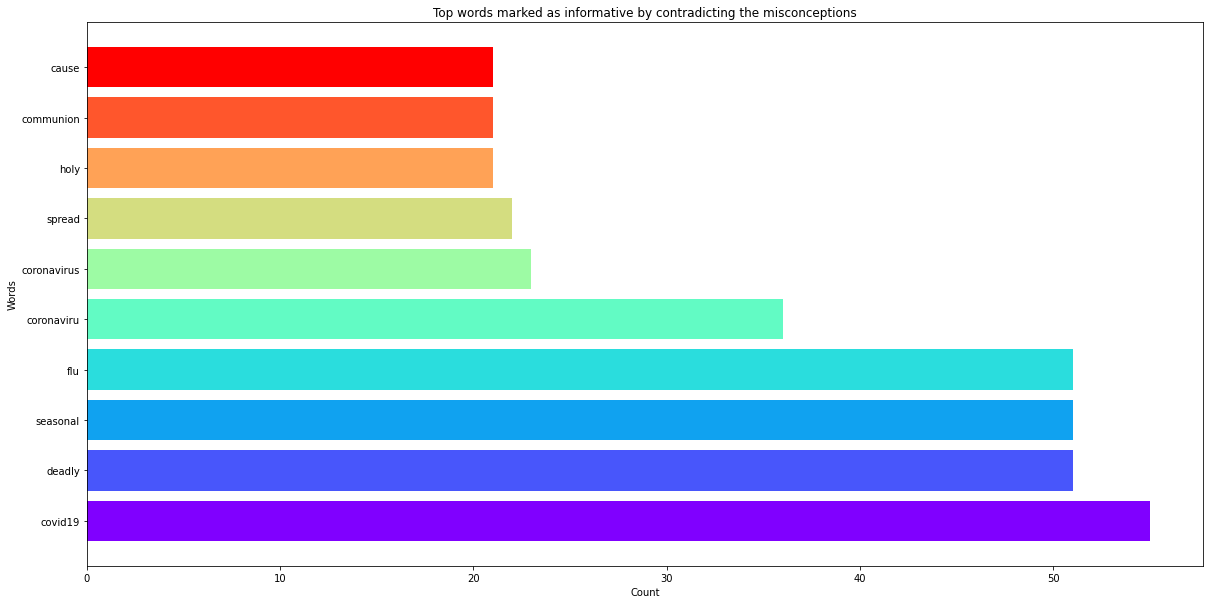

In [43]:
filtered_words = [word for word in all_words_neg.split()]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)


colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words marked as informative by contradicting the misconceptions')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

INPUT SPLIT

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000)
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

**MODEL TRAINING**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import MultinomialNB

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [49]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred, average='macro')

0.5670163896521014

In [50]:
accuracy_score(y_test,pred)

0.9362864077669902

In [51]:
cm = confusion_matrix(y_test, pred)

In [52]:
print(cm)

[[1515   12   10]
 [  60   13    2]
 [  20    1   15]]


In [53]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

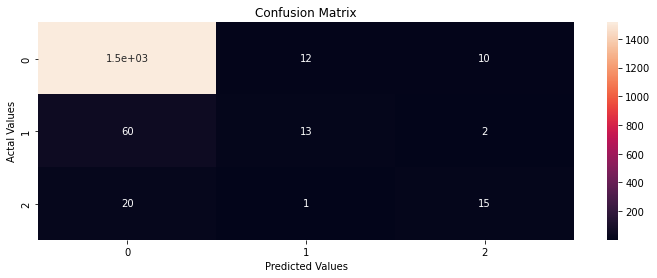

In [54]:
#Plotting the confusion matrix
plt.figure(figsize=(12,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [55]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
Yknn_test_predicted = knn.predict(x_test)
Yknn_test_predicted.shape

(1648,)

In [57]:
f1_score(y_test, Yknn_test_predicted, average='macro')

0.4006026500638569

In [58]:
accuracy_score(y_test,Yknn_test_predicted)

0.9283980582524272

In [59]:
cm = confusion_matrix(y_test, Yknn_test_predicted)

In [60]:
print(cm)

[[1515   22    0]
 [  60   15    0]
 [  20   16    0]]


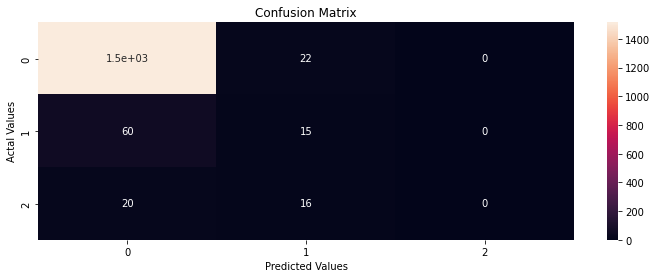

In [61]:
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

#Plotting the confusion matrix
plt.figure(figsize=(12,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [62]:
clf= MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [63]:
y_pred = clf.predict(x_test)

In [64]:
f1_score(y_test, y_pred, average='macro')

0.5204582016809991

In [65]:
accuracy_score(y_test,y_pred)

0.8519417475728155

In [66]:
cm = confusion_matrix(y_test,y_pred)

In [67]:
print(cm)

[[1343   91  103]
 [  32   37    6]
 [   8    4   24]]


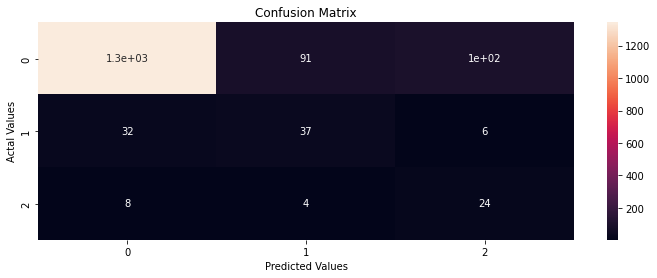

In [68]:
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])

#Plotting the confusion matrix
plt.figure(figsize=(12,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()